In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spotify_app_reviews.csv')

df.head()

,Review
0,"Great music service, the audio is high quality..."
1,Please ignore previous negative rating. This a...
2,"This pop-up ""Get the best Spotify experience o..."
3,Really buggy and terrible to use as of recently
4,Dear Spotify why do I get songs that I didn't ...


# Preprocesamiento

1. Convertir a minusculas todo
2. Eliminar puntuación, números
3. Tokenizar
3. Eliminar stopwords

In [4]:
def letter_to_lower(letter: str) -> str:
        ascii_code = ord(letter)
        if 65 <= ascii_code <= 90:
            return chr(ascii_code + 32)
        elif ascii_code == 209:
            return chr(241)
        else:
            return letter

def word_to_lower(word: str) -> str:
    result = ''
    for letter in word:
        result += letter_to_lower(letter)
    return result


In [5]:
def remove_special(text: str, remove_numbers: bool = True) -> str:
    result = ''
    for char in text:
        if char.isalpha() or char.isspace():
            result += char
        elif char.isdigit() and not remove_numbers:
            result += char
    return result

In [6]:
def tokenize(text: str) -> list:
    tokens = list()
    j = 0
    for i in range(len(text)):
        char = text[i]

        if char == ' ':
            tokens.append(text[j:i])
            j = i + 1
    
    tokens.append(text[j:])
    
    return tokens


In [7]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(tokens: list) -> list:
    stop_words = set(stopwords.words('english'))
    
    return [token for token in tokens if token not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ismaelporto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def preprocess(review: str) -> list:
    # Minusculas
    review = word_to_lower(review)
    # Eliminar puntuación, números
    review = remove_special(review, remove_numbers=False)
    review = review.strip() # Eliminar posibles espacios al inicio y al final
    # Tokeniazcion
    tokens = tokenize(review)
    
    tokens = remove_stopwords(tokens)
    return tokens

def get_vocabulary(tokens:list) -> list:
    vocabulary = set()
    for sentence in tokens:
        vocabulary.update(sentence)
    
    return list(vocabulary)

In [58]:
corpus = [
    "La app funciona bien, aunque a veces se cierra sola.",
    "Muy buena aplicación, la uso todos los días.",
    "Desde la última actualización no abre, pésima experiencia.",
    "Demasiados anuncios, es imposible usarla con normalidad.",
    "Es perfecta para lo que necesito, muy recomendable.",
    "No carga correctamente y se traba todo el tiempo.",
    "La interfaz es intuitiva y el diseño me encanta.",
    "Después de instalarla dejó de funcionar mi cámara.",
    "Excelente app, muy útil y fácil de usar.",
    "No me gustó nada, tiene muchos bugs y errores."
]

tokens = [preprocess(document) for document in corpus]

tokens

[['la', 'app', 'funciona', 'bien', 'aunque', 'veces', 'se', 'cierra', 'sola'],
 ['muy', 'buena', 'aplicación', 'la', 'uso', 'todos', 'los', 'días'],
 ['desde', 'la', 'última', 'actualización', 'abre', 'pésima', 'experiencia'],
 ['demasiados', 'anuncios', 'es', 'imposible', 'usarla', 'con', 'normalidad'],
 ['es', 'perfecta', 'para', 'lo', 'que', 'necesito', 'muy', 'recomendable'],
 ['carga', 'correctamente', 'se', 'traba', 'todo', 'el', 'tiempo'],
 ['la', 'interfaz', 'es', 'intuitiva', 'el', 'diseño', 'encanta'],
 ['después', 'de', 'instalarla', 'dejó', 'de', 'funcionar', 'mi', 'cámara'],
 ['excelente', 'app', 'muy', 'útil', 'fácil', 'de', 'usar'],
 ['gustó', 'nada', 'tiene', 'muchos', 'bugs', 'errores']]

In [59]:
vocabulary = get_vocabulary(tokens)

In [16]:
def bag_of_words(vocab: list, sentence_tokens: list):
    vector = [0] * len(vocab)
    for word in sentence_tokens:
        if word in vocab:
            idx = vocab.index(word)
            vector[idx] += 1
    return vector


In [61]:
print(f'Vocabulario\n{vocabulary}')
bow_vectors = [bag_of_words(vocabulary, sentence) for sentence in tokens]
print("Bag of Words Vectors:")
for vector in bow_vectors:
    print(vector)


Vocabulario
['aplicación', 'experiencia', 'última', 'útil', 'anuncios', 'muy', 'app', 'se', 'instalarla', 'diseño', 'veces', 'imposible', 'con', 'todos', 'normalidad', 'lo', 'carga', 'bugs', 'funciona', 'cámara', 'fácil', 'los', 'dejó', 'usar', 'de', 'pésima', 'errores', 'demasiados', 'muchos', 'intuitiva', 'actualización', 'nada', 'bien', 'sola', 'buena', 'necesito', 'interfaz', 'aunque', 'encanta', 'que', 'perfecta', 'desde', 'usarla', 'mi', 'es', 'recomendable', 'traba', 'para', 'el', 'gustó', 'correctamente', 'excelente', 'días', 'la', 'cierra', 'funcionar', 'abre', 'tiene', 'después', 'uso', 'todo', 'tiempo']
Bag of Words Vectors:
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

[1 1 1 1 1 3 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 4 1 1 1 1 1 1 1 1]


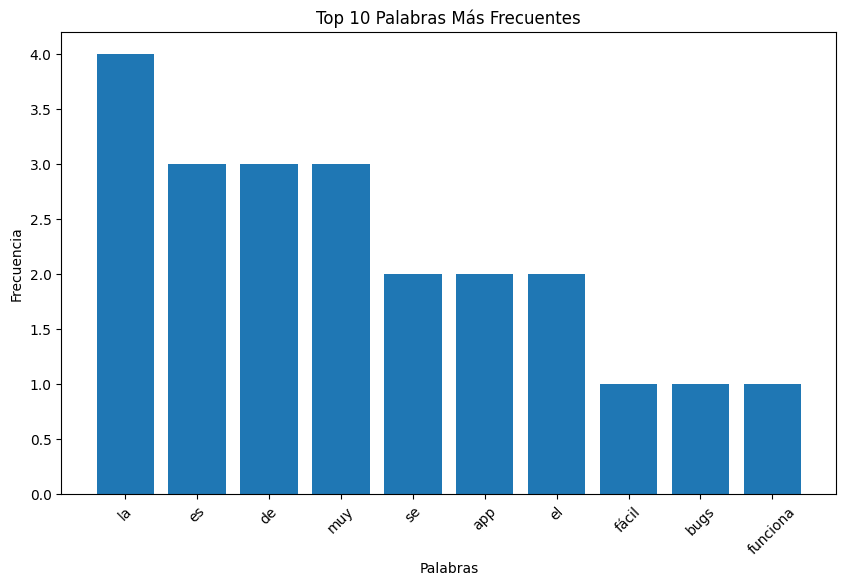

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Sumar los vectores para obtener la frecuencia total de cada palabra
word_freq = np.sum(bow_vectors, axis=0)

print(word_freq)

sorted_idx = np.argsort(word_freq)[::-1]
top_words = np.array(vocabulary)[sorted_idx][:10]
top_freqs = word_freq[sorted_idx][:10]

plt.figure(figsize=(10, 6))
plt.bar(top_words, top_freqs)
plt.title("Top 10 Palabras Más Frecuentes")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


In [9]:
df['cleaned_reviews'] = df['Review'].apply(preprocess)

In [10]:
df.head()

,Review,cleaned_reviews
0,"Great music service, the audio is high quality...","[great, music, service, audio, high, quality, ..."
1,Please ignore previous negative rating. This a...,"[please, ignore, previous, negative, rating, a..."
2,"This pop-up ""Get the best Spotify experience o...","[popup, get, best, spotify, experience, androi..."
3,Really buggy and terrible to use as of recently,"[really, buggy, terrible, use, recently]"
4,Dear Spotify why do I get songs that I didn't ...,"[dear, spotify, get, songs, didnt, put, playli..."


In [11]:
vocabulary = get_vocabulary(df['cleaned_reviews'])

vocabulary

['',
 'straight',
 'lesson',
 'satellite',
 'include',
 'help',
 'reinstall',
 'popup',
 'toolbar',
 'alot',
 'joox',
 'suspicious',
 'skipping',
 'way',
 'lose',
 'like',
 'button',
 'didnt',
 'acceptable',
 '68',
 'shuffle',
 'issue',
 'thing',
 'pressed',
 'scroll',
 'music',
 'connection',
 'etc',
 'deleting',
 'light',
 'station',
 'near',
 'bottom',
 'account',
 'eepecially',
 'rated',
 'ways',
 'rotate',
 'randomly',
 'profit',
 'upgrade',
 'night',
 'short',
 'kicks',
 'unuser',
 'whats',
 'allow',
 'musicso',
 'amount',
 'disturbance',
 'hated',
 'wont',
 'glitches',
 'throwing',
 'downside',
 'device',
 'changing',
 'absolutely',
 'album',
 'background',
 'system',
 'highly',
 'period',
 'hyuh',
 'okay',
 'business',
 'whether',
 'uninstall',
 'impossible',
 'birthday',
 'logo',
 'liking',
 'rearrange',
 'stars',
 'theres',
 'services',
 'running',
 'rate',
 'merging',
 'mb',
 'useless',
 'unable',
 'ur',
 '10',
 'v8698900',
 'idk',
 'say',
 'please',
 'audios',
 'android',
 

In [17]:
print(f'Vocabulario\n{vocabulary}')
bow_vectors = [bag_of_words(vocabulary, sentence) for sentence in df['cleaned_reviews']]
print("Bag of Words Vectors:")
for vector in bow_vectors:
    print(vector)


Vocabulario
['', 'straight', 'lesson', 'satellite', 'include', 'help', 'reinstall', 'popup', 'toolbar', 'alot', 'joox', 'suspicious', 'skipping', 'way', 'lose', 'like', 'button', 'didnt', 'acceptable', '68', 'shuffle', 'issue', 'thing', 'pressed', 'scroll', 'music', 'connection', 'etc', 'deleting', 'light', 'station', 'near', 'bottom', 'account', 'eepecially', 'rated', 'ways', 'rotate', 'randomly', 'profit', 'upgrade', 'night', 'short', 'kicks', 'unuser', 'whats', 'allow', 'musicso', 'amount', 'disturbance', 'hated', 'wont', 'glitches', 'throwing', 'downside', 'device', 'changing', 'absolutely', 'album', 'background', 'system', 'highly', 'period', 'hyuh', 'okay', 'business', 'whether', 'uninstall', 'impossible', 'birthday', 'logo', 'liking', 'rearrange', 'stars', 'theres', 'services', 'running', 'rate', 'merging', 'mb', 'useless', 'unable', 'ur', '10', 'v8698900', 'idk', 'say', 'please', 'audios', 'android', 'even', 'death', 'special', 'random', 'suggested', 'playlists', 'asks', 'reque

[16  2  1  1  1  4  1  1  1  2  1  2  1  5  1 23  3  4  1  1  8  5  6  1
  1 36  1  2  3  1  1  1  3  5  1  1  1  2  3  1  1  1  2  1  1  3  1  1
  1  1  1  5  1  1  1  1  1  1  2  3  1  1  1  1  1  1  1  1  1  1  5  1
  1  2  2  1  1  2  1  2  1  4  2  2  1  1  3 10  1  3 16  1  1  5  1  8
  1  1  1  1  4  1  1  1  1 26  3  2  3  1  3  1  1  1  1  4  1  1  1 13
 10  3  1  1  1  1  1  2  1  1  1  2  1  3  1  5  1  1  2  1  1  1  2 24
 37  1  1  1  1  2  5  1  1  1  3  2  1  1  1  1  2 17  1  2  1  1  1  5
  1  1  2  4  1  5  1  1  1  1  1  5  5  1  2  1  1  4  1  1  1  3  1  1
  2  1  1  1  1  1  1  1  2  4 11  2  2  1  1  2  1  1  7  1  1  4  1  1
  1  2  5  8  1  1  6  3  1  1  1  1  1  1  2  1  1  1  5  1  2  4  9  1
  1  1  1  1  1  3  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1 12  3
  1  1  1  1  1  2  1  1  1  3 26  1  1  1  1  2  1  5  1  1  1  3  1  1
  1  1 14  1  2  2  1  2  2  2  2  5  1  2  2  1  1  3  4  2  3  1  6  1
  1  1  5  2  1  1  4  2  2  1  3  1  6  1  1  1  2

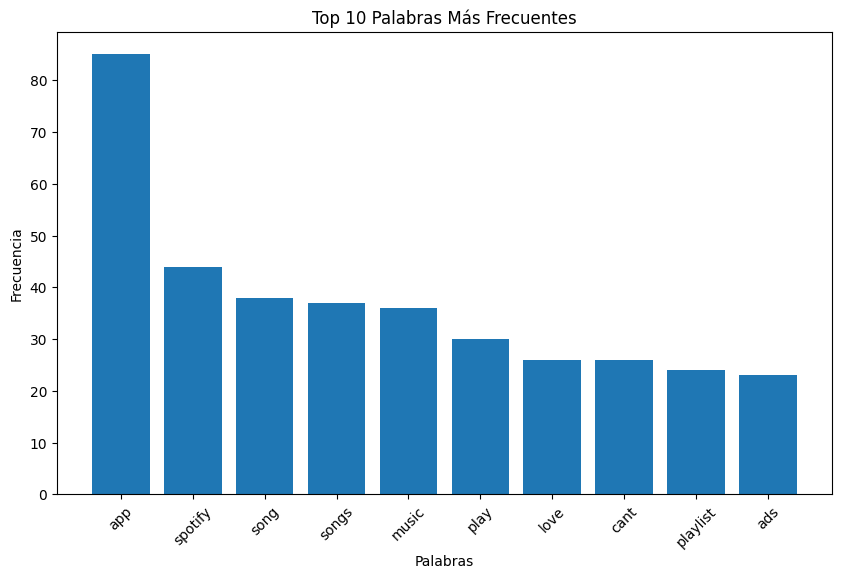

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sumar los vectores para obtener la frecuencia total de cada palabra
word_freq = np.sum(bow_vectors, axis=0)

print(word_freq)

sorted_idx = np.argsort(word_freq)[::-1]
top_words = np.array(vocabulary)[sorted_idx][:10]
top_freqs = word_freq[sorted_idx][:10]

plt.figure(figsize=(10, 6))
plt.bar(top_words, top_freqs)
plt.title("Top 10 Palabras Más Frecuentes")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()
